In [14]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [15]:
# load the data
df = pd.read_csv('DOGE-USD-daily 2021.csv', index_col=0, header = 0)
close_price = pd.DataFrame({"Close": df["Close"]})
close_price

,Close
Date,
2021-01-01,0.005685
2021-01-02,0.010615
2021-01-03,0.009771
2021-01-04,0.009767
2021-01-05,0.009920
...,...
2022-07-16,0.064280
2022-07-17,0.063107
2022-07-18,0.067715


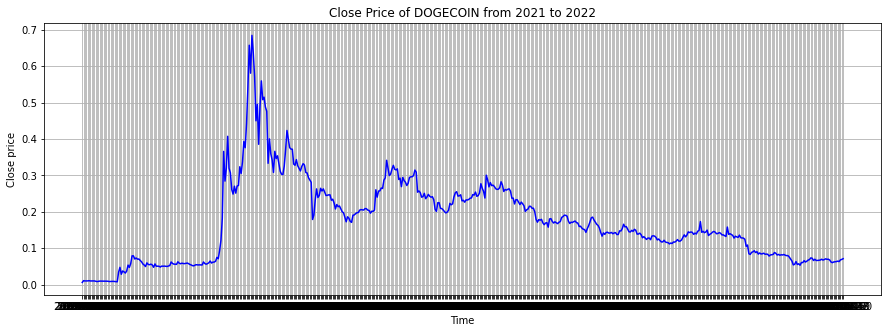

In [16]:
# Close Price of DOGECOIN from 2021 to 2022
plt.figure(figsize=(15,5))
plt.plot(close_price, linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.title('Close Price of DOGECOIN from 2021 to 2022')
plt.grid(True)
plt.show()

In [17]:
# calculate MAPE
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

# create lag variable
def create_lag(data, lag = 1):
    dataframe = pd.DataFrame()
    for i in range(lag, 0, -1):
        dataframe['t-' + str(i)] = data["Close"].shift(i)
    final_data = pd.concat([data, dataframe], axis=1)
    final_data.dropna(inplace=True)
    final_data.reset_index(inplace=True)
    return final_data
# split data
def split_data(final_data, test_length = 30):
    new_data = final_data.drop(['Date'], axis=1)
    new_data = new_data.reset_index(drop=True)
    end_point = len(new_data)
    x = end_point - test_length
    train = new_data.loc[:x - 1, :]
    test = new_data.loc[x:, :]
    test_x = test.loc[:, test.columns != 'Close']
    test_y = test['Close']
    train_x = train.loc[:, train.columns != 'Close']
    train_y = train['Close']
    return test_x, test_y, train_x, train_y


In [ ]:
# split data
final_data1 = create_lag(close_price, 1)
test_x1, test_y1, train_x1, train_y1 = split_data(final_data1)
# scale data and tune parameters to find the best model
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train1 = sc_x.fit_transform(train_x1)
x_test1 = sc_x.transform(test_x1)
y_train1 = sc_y.fit_transform(np.array(train_y1).reshape(-1,1))
y_test1 = sc_y.transform(np.array(test_y1).reshape(-1,1))

regressor1 = SVR(kernel="rbf")
regressor1.fit(x_train1, y_train1)
y_pred1 = regressor1.predict(x_test1)

score1 = r2_score(y_test1,y_pred1)
mean_error1 = mean_squared_error(y_test1,y_pred1)

print("R2 SCORE is", score1)
print("mean_sqrd_error is ", mean_error1)

y_prediction1 = sc_y.inverse_transform(np.array(y_pred1).reshape(-1,1))
y_prediction1 = y_prediction1.flatten()
mape_result1 = mape(test_y1, y_prediction1)

lag = 1
min_mse = mean_error1
min_mape = mape_result1
min_score = score1

for i in range (2, 101):
    final_data = create_lag(close_price, i)
    test_x, test_y, train_x, train_y = split_data(final_data)

    sc_x = StandardScaler()
    sc_y = StandardScaler()
    x_train = sc_x.fit_transform(train_x)
    x_test = sc_x.transform(test_x)
    y_train = sc_y.fit_transform(np.array(train_y).reshape(-1,1))
    y_test = sc_y.transform(np.array(test_y).reshape(-1,1))

    regressor = SVR(kernel="rbf")
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    y_pred

    score = r2_score(y_test,y_pred)
    mean_error = mean_squared_error(y_test,y_pred)

    y_prediction = sc_y.inverse_transform(np.array(y_pred).reshape(-1, 1))
    y_prediction = y_prediction.flatten()
    mape_result = mape(test_y, y_prediction)
    if mean_error < min_mse:
        min_mse = mean_error
        min_mape = mape_result
        lag = i
        min_score = score

print("Lag is ", lag)
print("R2 SCORE is", min_score)
print("mean_sqrd_error is ", min_mse)
print("mape is ", min_mape)

In [39]:
# The best model is lag = 20, kernel = "rbf"
# split data
final_data = create_lag(close_price, 20)
test_x, test_y, train_x, train_y = split_data(final_data)
# transfer the data
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(train_x)
x_test = sc_x.transform(test_x)
y_train = sc_y.fit_transform(np.array(train_y).reshape(-1,1))
y_test = sc_y.transform(np.array(test_y).reshape(-1,1))
# predict
regressor = SVR(kernel="rbf")
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
# calculate r2 score and mse
score = r2_score(y_test,y_pred)
mean_error = mean_squared_error(y_test,y_pred)
# inverse the prediction
y_prediction = sc_y.inverse_transform(np.array(y_pred).reshape(-1,1))
y_prediction = y_prediction.flatten()
# calculate mape
mape_result = mape(test_y, y_prediction)
mse_post = mean_squared_error(test_y, y_prediction)
print("R2 SCORE is", score)
print("mse_post is ", mse_post )
print("mean_sqrd_error is ", mean_error)
print("mape is ", mape_result)
print("accuracy is ", 100-mape_result)

R2 SCORE is 0.17579200353621627
mse_post is  7.516501284206293e-06
mean_sqrd_error is  0.0006300065946298355
mape is  3.240963507905344
accuracy is  96.75903649209465


/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


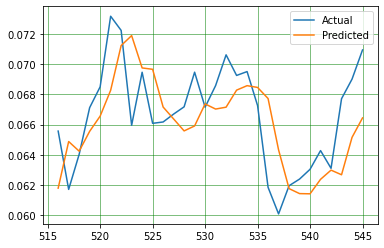

In [18]:
# plot the best model
df1 = pd.DataFrame({'Actual': test_y, 'Predicted': y_prediction})
df1.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
## out of sample result
# read updated data
outofsample = pd.read_csv('DOGE-USD-updated.csv', index_col=0, header = 0)
Close = pd.DataFrame({"Close": outofsample["Close"]})
# split data
out_data = create_lag(Close, 20)
test_x_o, test_y_o, train_x_o, train_y_o = split_data(out_data, test_length = 11)
# transfer the data
sc_x_o = StandardScaler()
sc_y_o = StandardScaler()
x_train_o = sc_x_o.fit_transform(train_x_o)
x_test_o = sc_x_o.transform(test_x_o)
y_train_o = sc_y_o.fit_transform(np.array(train_y_o).reshape(-1,1))
y_test_o = sc_y_o.transform(np.array(test_y_o).reshape(-1,1))
# predict
regressor_o = SVR(kernel="rbf")
regressor_o.fit(x_train_o, y_train_o)
y_pred_o = regressor_o.predict(x_test_o)
# calculate r2 score and mse
mean_error_o = mean_squared_error(y_test_o,y_pred_o)
# inverse the prediction
y_prediction_o = sc_y_o.inverse_transform(np.array(y_pred_o).reshape(-1,1))
y_prediction_o = y_prediction_o.flatten()
# calculate mape
mape_result_o = mape(test_y_o, y_prediction_o)
print("mean_sqrd_error is ", mean_error_o)
print("mape is ", mape_result_o)
mse_post_o=mean_squared_error(test_y_o, y_prediction_o)
print(f'mse is  {mse_post_o}')
print("accuracy is ", 100-mape_result_o)

R2 SCORE is -0.16615905058329483
mean_sqrd_error is  0.0006034815692974244
mape is  3.1987196860232965
mse is  7.227917674045728e-06
accuracy is  96.8012803139767


/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 SCORE is -0.16615905058329394
mse is  7.227917674045728e-06


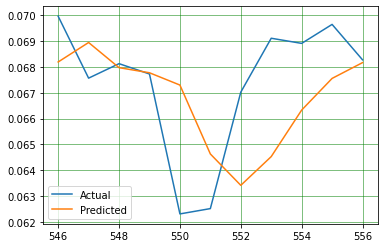

In [40]:
## plot the out of sample result
df2 = pd.DataFrame({'Actual': test_y_o, 'Predicted': y_prediction_o})
df2.plot(kind='line')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()